**필요한 라이브러리 설치**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submit = pd.read_csv('gender_submission.csv')

survived : 생존여부(사망 : 0, 생존 : 1)  
pclass : 티켓등급(1 = 1등급)  
sibsp : 형제자매/배우자  
parch : 부모/자녀  
ticket : 티켓번호  
fare : 요금  
cabin : 선실 번호  
embarked : 탑승 장소(S, C, Q)

In [3]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Master. Sigvard Harald Elias",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**변수 간 상관계수 확인**

<AxesSubplot:>

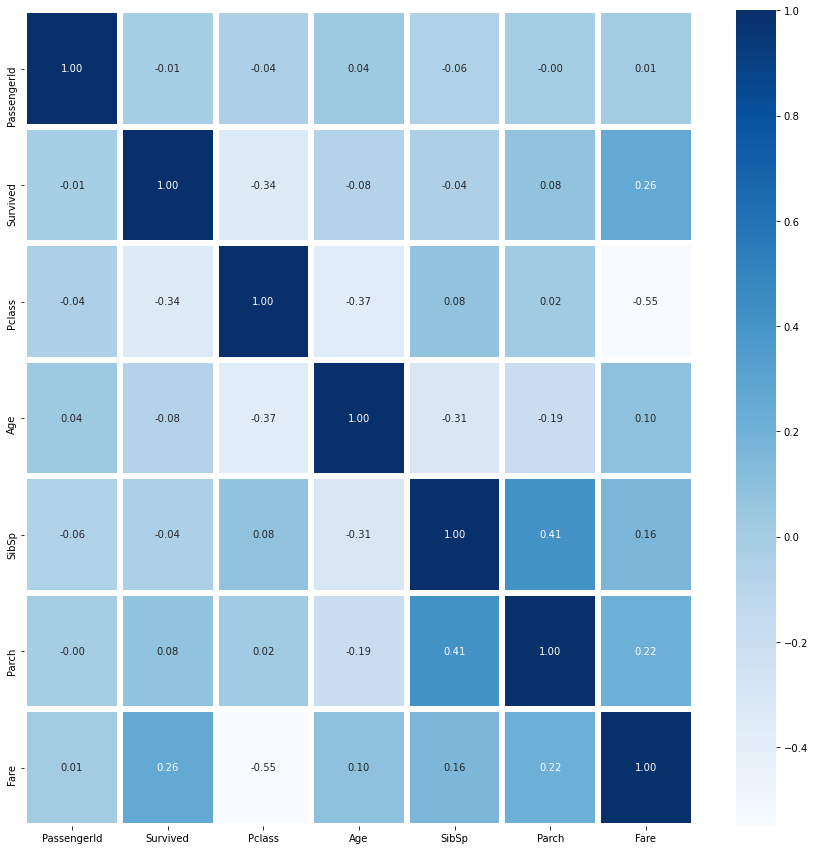

In [8]:
plt.figure(figsize = (15, 15))
sns.heatmap(data = train.corr(), annot = True, fmt = ".2f",
           linewidths = 5, cmap = 'Blues')

**결측치 확인**

Age, Fare, Cabin, Embarked에 결측치 존재

In [9]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**EDA 및 데이터 전처리**

종속변수 Survived

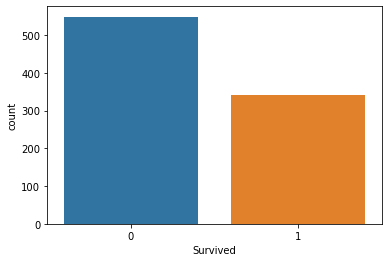

In [11]:
sns.countplot(x = 'Survived', data = train)
plt.show()

독립변수

PassengerId 변수

In [12]:
train = train.drop(['PassengerId'], axis = 1)
test = test.drop(['PassengerId'], axis = 1)

Pclass 변수

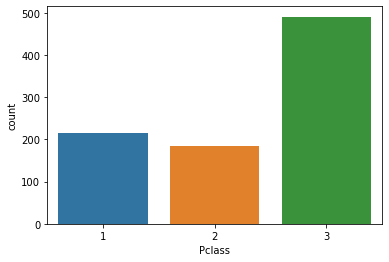

In [13]:
sns.countplot(x = 'Pclass', data = train)
plt.show()

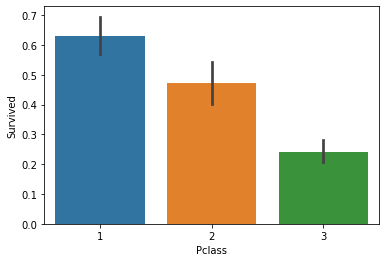

In [14]:
sns.barplot(x = train['Pclass'], y = train['Survived'])
plt.show()

티켓 등급에 따른 생존율 1등급 > 2등급 > 3등급  
3등급의 티켓을 가진 승객이 더 많지만 생존율은 그 반대의 모습을 띈다.

Name 변수

정규표현식을 활용하여 이름의 호칭(Name의 ,/. 사이에 있는 문자)을 추출하여 'Title'이라는 변수를 만든다.  
그 당시 호칭을 통해 성별을 알 수 있었기 때문에 'Title'마다 성별의 분포를 확인한다.

In [15]:
combine = [train, test]

for dataset in combine : 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


17개의 호칭을 6개(Mr, Mrs, Miss, Master, Rare, Royal)의 호칭으로 구분해준다.

In [17]:
for dataset in combine : 
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Don',
                                               'Major', 'Dr', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

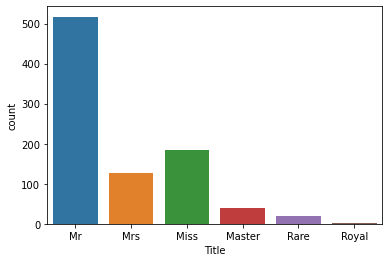

In [18]:
sns.countplot(x = 'Title', data = train)
plt.show()

축약시킨 호칭 별 생존율을 확인한 결과, 여자를 지칭하는 'Miss', 'Mrs'와 높은 직위를 나타내는 'Master', 'Royal'의 생존율이 높다.

In [19]:
train[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.250000
Royal,1.000000


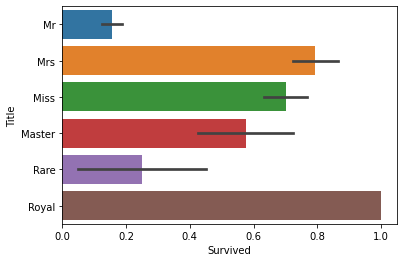

In [20]:
sns.barplot(x = 'Survived', y = 'Title', data = train)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Title'] = le.fit_transform(train['Title'])
test['Title'] = le.fit_transform(test['Title'])

In [22]:
train['Title'].value_counts()

2    517
1    185
3    126
0     40
4     20
5      3
Name: Title, dtype: int64

Sex 변수

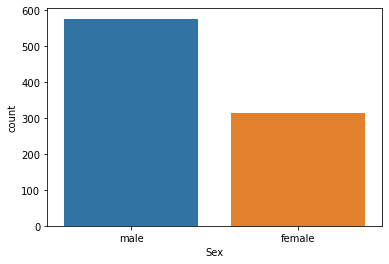

In [23]:
sns.countplot(x = 'Sex', data = train)
plt.show()

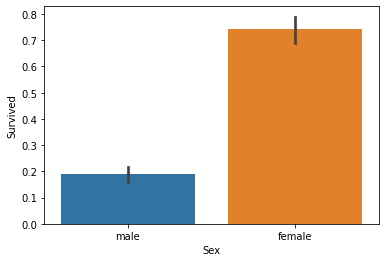

In [24]:
sns.barplot(x = train['Sex'], y = train['Survived'])
plt.show()

탑승객의 성별은 여성보다 남성이 많지만 생존율은 남성보다 여성이 더 높다.  
이 데이터로 보아, 비교적 약자인 여성이 먼저 탈출할 수 있도록 한 것으로 알 수 있다.

In [25]:
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])

Age 변수

결측값 처리 -> 티켓 등급 별 호칭에 따른 나이의 평균을 결측치에 대입한다.

In [26]:
train.groupby(['Pclass', 'Title'])[['Age']].mean()

Age
Pclass Title           
1      0       5.306667
       1      29.744681
       2      41.580460
       3      40.400000
       4      48.727273
       5      43.333333
2      0       2.258889
       1      22.560606
       2      32.768293
       3      33.682927
       4      42.000000
3      0       5.350833
       1      16.123188
       2      28.724891
       3      33.515152

In [27]:
test.groupby(['Pclass', 'Title'])[['Age']].mean()

Age
Pclass Title           
1      0       9.500000
       1      31.428571
       2      41.200000
       3      45.606061
       4      48.000000
2      0       5.000000
       1      17.370000
       2      31.718182
       3      33.000000
       4      35.500000
3      0       7.454615
       1      19.872647
       2      27.198795
       3      29.875000

In [28]:
train['Age'].fillna(train.groupby(['Pclass', 'Title'])['Age'].transform('mean'),
                   inplace = True)

In [29]:
test['Age'].fillna(test.groupby(['Pclass', 'Title'])['Age'].transform('mean'),
                   inplace = True)

~ 8세 : Baby  
8 ~ 16세 : Child  
16 ~ 22세 : Student  
22 ~ 35세 : Young Adult  
35 ~ 60세 : Adult  
60 ~ 세 : Senior

In [30]:
for dataset in combine :
    dataset.loc[dataset['Age'] <= 8, 'Agegroup'] = 'Baby'
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 16), 'Agegroup'] = 'Child'
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 22), 'Agegroup'] = 'Student'
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 35), 'Agegroup'] = 'Young Adult'
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 60), 'Agegroup'] = 'Adult'
    dataset.loc[dataset['Age'] > 60, 'Agegroup'] = 'Senior'

In [31]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Agegroup
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Student
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3,Adult
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Young Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3,Young Adult
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Young Adult


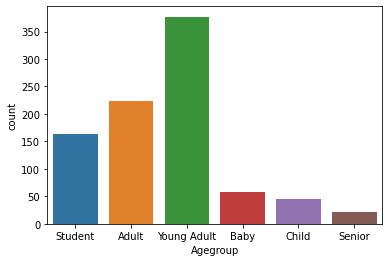

In [32]:
sns.countplot(x = 'Agegroup', data = train)
plt.show()

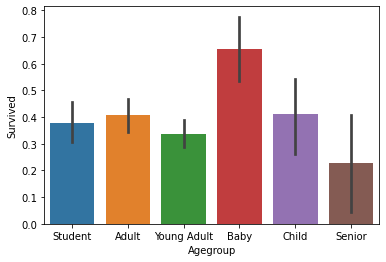

In [33]:
sns.barplot(x = 'Agegroup', y = 'Survived', data = train)
plt.show()

나이가 어린 Baby와 Child의 생존율이 가장 높다.

In [34]:
train['Agegroup'] = le.fit_transform(train['Agegroup'])
test['Agegroup'] = le.fit_transform(test['Agegroup'])

SipSp 변수

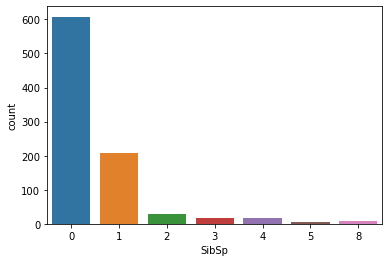

In [35]:
sns.countplot(x = 'SibSp', data = train)
plt.show()

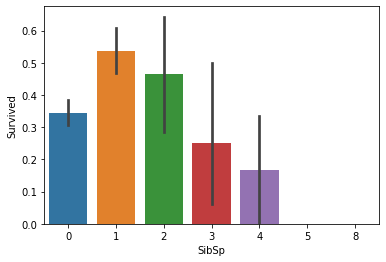

In [36]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
plt.show()

혼자 탑승한 승객이 가장 많지만, 가족과 함께 탑승한 승객의 생존율보다 낮다.

Parch 변수

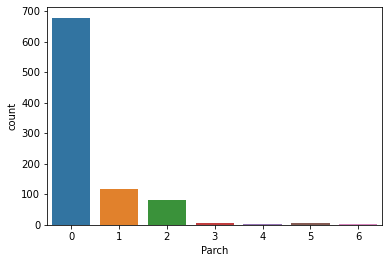

In [37]:
sns.countplot(x = 'Parch', data = train)
plt.show()

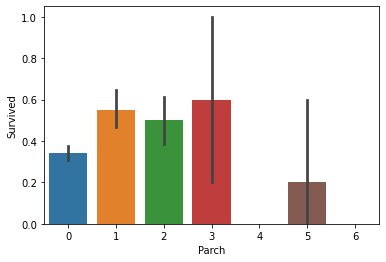

In [38]:
sns.barplot(x = 'Parch', y = 'Survived', data = train)
plt.show()

혼자 탑승한 승객이 가장 많지만, 가족과 함께 탑승한 승객의 생존율보다 낮다.

SibSp 변수와 Parch 변수 합치기

같이 탑승한 가족의 수를 뜻하는 'SibSp' 변수와 'Parch' 변수를 합쳐서 'Fam_size'의 변수를 만든다.  
1 : Solo  
2 ~ 4 :Nuclear  
4 이상 : Big

In [39]:
for i in combine :
    i['Fam_size'] = np.where((i['SibSp'] + i['Parch']) == 1, 'Solo',
                            np.where((i['SibSp'] + i['Parch']) <= 4, 'Nuclear', 'Big'))

In [40]:
train['Fam_size'] = le.fit_transform(train['Fam_size'])
test['Fam_size'] = le.fit_transform(test['Fam_size'])

Ticket 변수

티켓번호의 앞글자(Ticket_Lett)와 티켓번호(Ticket_Len)의 길이를 추출한다.

In [41]:
for i in [train, test] :
    i['Ticket_Lett'] = i['Ticket'].apply(lambda x : str(x)[0])
    i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x : str(x))
    i['Ticket_Len'] = i['Ticket'].apply(lambda x : len(x))

In [42]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Agegroup,Fam_size,Ticket_Lett,Ticket_Len
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,4,2,A,9
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3,0,2,P,8
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,5,1,S,16
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3,5,2,1,6
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,5,1,3,6


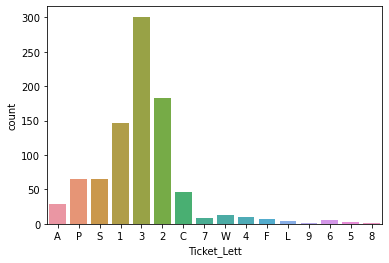

In [43]:
sns.countplot(x = 'Ticket_Lett', data = train)
plt.show()

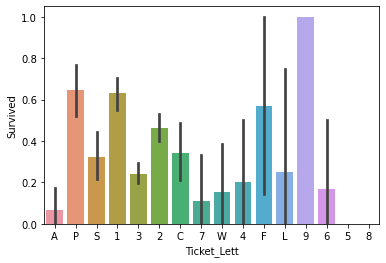

In [44]:
sns.barplot(x = 'Ticket_Lett', y = 'Survived', data = train)
plt.show()

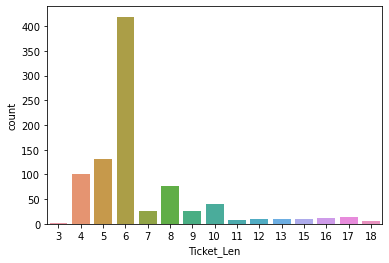

In [45]:
sns.countplot(x = 'Ticket_Len', data = train)
plt.show()

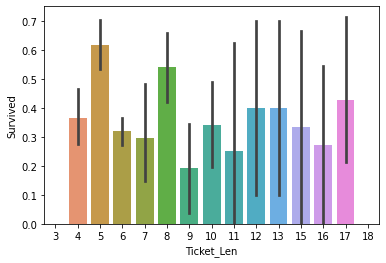

In [46]:
sns.barplot(x = 'Ticket_Len', y = 'Survived', data = train)
plt.show()

티켓번호 앞글자가 'A', '3', '7', 'W', '4', 'L', '5', '8', '6'인 승객의 생존율이 낮기 때문에 'Low_ticket'으로 묶고, 나머지는 'Other_ticket'으로 묶는다.

In [47]:
for i in [train, test] :
    i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['A', '3', '7', 'W', '4', 'L', '5', '8', '6']),
                               'Low_ticket', 'Other_ticket')

In [48]:
train['Ticket_Lett'] = le.fit_transform(train['Ticket_Lett'])
test['Ticket_Lett'] = le.fit_transform(test['Ticket_Lett'])

Fare 변수

결측값 처리 -> 티켓등급 별 요금의 평균을 결측치에 대입한다.

In [49]:
test['Fare'].fillna(test.groupby(['Pclass'])['Fare'].transform('mean'),
                   inplace = True)

In [50]:
test.isnull().sum()

Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Agegroup         0
Fam_size         0
Ticket_Lett      0
Ticket_Len       0
dtype: int64

'Fare' 변수를 일정한 길이로 4범위로 나눈 'Fareband' 변수를 생성한다.

In [51]:
train['Fareband'] = pd.qcut(train['Fare'], q = 4, labels = [1, 2, 3, 4])
test['Fareband'] = pd.qcut(train['Fare'], q = 4, labels = [1, 2, 3, 4])

In [52]:
train['Fareband'].value_counts()

2    224
1    223
4    222
3    222
Name: Fareband, dtype: int64

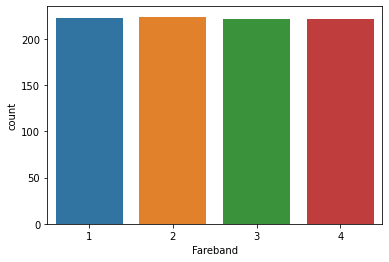

In [53]:
sns.countplot(x = 'Fareband', data = train)
plt.show()

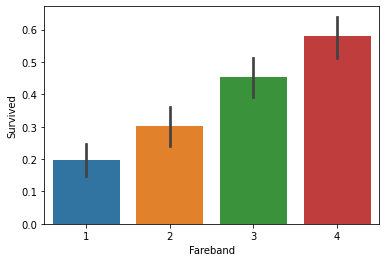

In [54]:
sns.barplot(x = 'Fareband', y = 'Survived', data = train)
plt.show()

요금과 생존율이 비례한다.

Cabin 변수

Cabin 변수는 결측값이 대부분이므로 CabinBool 변수를 새로 만들어서 결측값인 데이터는 0, 결측값이 아닌 데이터는 1로 둔다.

In [55]:
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (train['Cabin'].notnull().astype('int'))

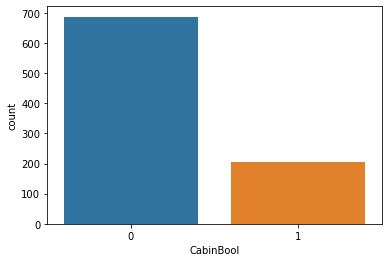

In [56]:
sns.countplot(x = 'CabinBool', data = train)
plt.show()

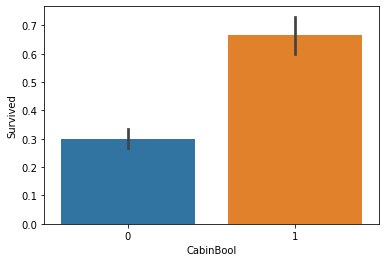

In [57]:
sns.barplot(x = 'CabinBool', y = 'Survived', data = train)
plt.show()

CabinBool이 1, 즉 선실번호의 데이터가 있는 승객의 생존율이 높다.

Embarked 변수

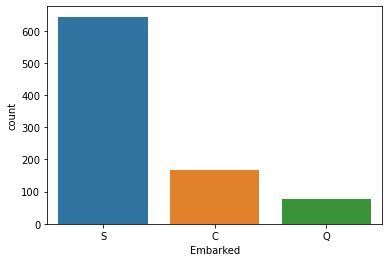

In [58]:
sns.countplot(x = 'Embarked', data = train)
plt.show()

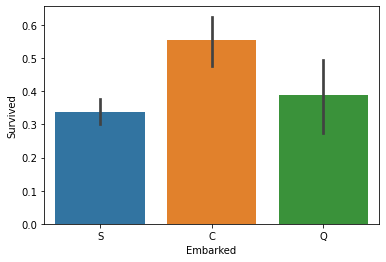

In [59]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.show()

결측값 처리 -> 대다수의 승객이 'S'에서 탑승했으므로 결측치를 'S'로 대입한다.

In [60]:
train['Embarked'] = train['Embarked'].fillna('S')

In [61]:
train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.fit_transform(test['Embarked'])

In [62]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Agegroup,Fam_size,Ticket_Lett,Ticket_Len,Fareband,CabinBool
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,4,2,0,9,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,0,2,1,8,4,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,5,1,1,16,2,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,5,2,1,6,4,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,5,1,0,6,2,0


In [63]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Agegroup,Fam_size,Ticket_Lett,Ticket_Len,Fareband,CabinBool
0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,2,5,1,0,6,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,3,0,2,0,6,4,1
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,2,3,1,1,6,2,0
3,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,2,5,1,0,6,4,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,3,4,1,0,7,2,0


In [64]:
print('train 변수 : ', train.columns)
print('test 변수 : ', test.columns)

train 변수 :  Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'Agegroup', 'Fam_size',
       'Ticket_Lett', 'Ticket_Len', 'Fareband', 'CabinBool'],
      dtype='object')
test 변수 :  Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title', 'Agegroup', 'Fam_size', 'Ticket_Lett',
       'Ticket_Len', 'Fareband', 'CabinBool'],
      dtype='object')


**필요없는 변수 제거**

In [65]:
train = train.drop('Name', axis=1)
test = test.drop('Name', axis = 1)

In [66]:
train = train.drop('Age', axis = 1)
test = test.drop('Age', axis = 1)

In [67]:
train = train.drop('SibSp', axis = 1)
test = test.drop('SibSp', axis = 1)

In [68]:
train = train.drop('Parch', axis = 1)
test = test.drop('Parch', axis = 1)

In [69]:
train = train.drop('Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)

In [70]:
train = train.drop('Fare', axis = 1)
test = test.drop('Fare', axis = 1)

In [71]:
train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

In [72]:
train.head()

,Survived,Pclass,Sex,Embarked,Title,Agegroup,Fam_size,Ticket_Lett,Ticket_Len,Fareband,CabinBool
0,0,3,1,2,2,4,2,0,9,1,0
1,1,1,0,0,3,0,2,1,8,4,1
2,1,3,0,2,1,5,1,1,16,2,0
3,1,1,0,2,3,5,2,1,6,4,1
4,0,3,1,2,2,5,1,0,6,2,0


In [73]:
test.head()

,Pclass,Sex,Embarked,Title,Agegroup,Fam_size,Ticket_Lett,Ticket_Len,Fareband,CabinBool
0,3,1,1,2,5,1,0,6,1,0
1,3,0,2,3,0,2,0,6,4,1
2,2,1,1,2,3,1,1,6,2,0
3,3,1,2,2,5,1,0,6,4,1
4,3,0,2,3,4,1,0,7,2,0


**모델링**

RFECV기법을 활용하여 변수 선택하기

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

X = train[['Pclass', 'Sex', 'Embarked', 'Title', 'Agegroup', 'Fam_size',
          'Ticket_Lett', 'Ticket_Len', 'Fareband', 'CabinBool']]
y = train['Survived']

rfecv = RFECV(estimator = LogisticRegression(), cv = 10, step = 1, scoring = 'accuracy')
rfecv.fit(X, y)

C:\Users\choim\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

5개의 변수('Sex', 'Title', 'Fam_size', 'Ticket_Lett', 'CabinBool')를 사용했을 때 정확도가 가장 높은 것으로 나타난다.

In [75]:
print(rfecv.n_features_)
print(list(X.columns[rfecv.support_]))

5
['Sex', 'Title', 'Fam_size', 'Ticket_Lett', 'CabinBool']


로지스틱 회귀분석

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = train[['Sex', 'Title', 'Fam_size', 'Ticket_Lett', 'CabinBool']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 49)
#print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predict = logreg.predict(X_valid)
acc_logreg = round(accuracy_score(predict, y_valid) * 100, 2)
print(acc_logreg)

81.01


랜덤포레스트

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 10)
rf.fit(X_train, y_train)

predict = rf.predict(X_valid)
acc_rf = round(accuracy_score(predict, y_valid) * 100, 2)
print(acc_rf)

82.68


서포트벡터머신(SVM)

In [78]:
from sklearn.svm import SVC

svc = SVC(C = 0.1)
svc.fit(X_train, y_train)

predict = svc.predict(X_valid)
acc_svc = round(accuracy_score(predict, y_valid) * 100, 2)
print(acc_svc)

78.21
